# Dummy Variables

In [2]:
import pandas as pd
train=pd.read_csv('http://bit.ly/kaggletrain')

In [3]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
train['sex_male']=train.Sex.map({'female':0,'male':1})

In [6]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0


In [8]:
pd.get_dummies(train.Sex).iloc[:,1:]

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [9]:
pd.get_dummies(train.Sex,prefix='Sex').iloc[:,1:]

,Sex_male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [10]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
pd.get_dummies(train.Embarked,prefix='EMbraked').iloc[:,0:].head(8)

,EMbraked_C,EMbraked_Q,EMbraked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1


In [14]:
train=pd.read_csv('http://bit.ly/kaggletrain')

In [16]:
pd.get_dummies(train,columns=['Sex','Embarked']).head(7)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,0,1,0,0,1


# Date and time in pandas

In [17]:
ufo=pd.read_csv('http://bit.ly/uforeports')
ufo.head(7)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00


In [18]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [19]:
ufo.Time.str.slice(-5,-3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [21]:
ufo['Time']=pd.to_datetime(ufo.Time)

In [22]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [23]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [25]:
ufo.Time.dt.hour.head(5)

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [26]:
ufo.Time.dt.year.head(5)

0    1930
1    1930
2    1931
3    1931
4    1933
Name: Time, dtype: int64

In [27]:
ufo.Time.dt.weekday.head(5)

0    6
1    0
2    6
3    0
4    1
Name: Time, dtype: int64

In [28]:
ufo.Time.dt.weekday_name.head(5)

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [29]:
ufo.Time.dt.dayofyear.head(5)

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

In [34]:
ufo.loc[ufo.Time>='1/1/1999',:].head(5)

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [35]:
%matplotlib inline

In [36]:
ufo['year']=ufo.Time.dt.year

In [37]:
ufo.head(7)

,City,Colors Reported,Shape Reported,State,Time,year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933
5,Valley City,NaN,DISK,ND,1934-09-15 15:30:00,1934
6,Crater Lake,NaN,CIRCLE,CA,1935-06-15 00:00:00,1935


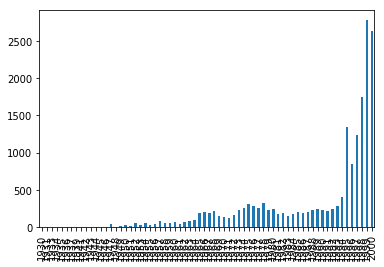

In [40]:
ufo.year.value_counts().sort_index().plot(kind='bar')

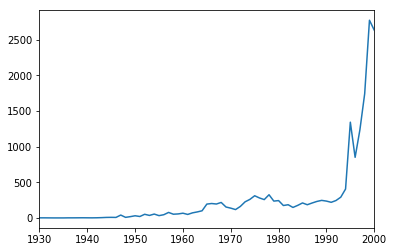

In [41]:
ufo.year.value_counts().sort_index().plot()

# copy warning on pandas

In [42]:
movies=pd.read_csv('http://bit.ly/imdbratings')

In [43]:
movies.content_rating.isnull().sum()

3

In [44]:
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [46]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [47]:
import numpy as np

In [49]:
movies[movies.content_rating=='NOT RATED'].content_rating=np.nan

C:\Users\Dinesh Sekaran\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [50]:
movies.content_rating.isnull().sum()

3

In [51]:
movies.loc[movies.content_rating=='NOT RATED','content_rating']=np.nan

In [53]:
movies.content_rating.isnull().sum()

68

In [52]:
movies.content_rating.value_counts()

R           460
PG-13       189
PG          123
APPROVED     47
UNRATED      38
G            32
PASSED        7
NC-17         7
X             4
GP            3
TV-MA         1
Name: content_rating, dtype: int64

In [54]:
top_rated_movies=movies.loc[movies.star_rating > 5,:]

In [55]:
top_rated_movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


# Display option in pandas

In [ ]:
set_option('display.float_format',{:,}.format)
get_option('display_max_rows')
display.max_colwidth

In [ ]:
pd.describe_option('rows')

# Apply Functions in pandas

In [56]:
train=pd.read_csv('http://bit.ly/kaggletrain')

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# MAp is a series method

In [58]:
train['Sex_num']=train.Sex.map({'female':0,'male':1})

In [59]:
train.loc[:4,['Sex','Sex_num']]

,Sex,Sex_num
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [60]:
# Apply Method
train['Name_len']=train.Name.apply(len)

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Name_len
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,24


In [62]:
import numpy as py

In [63]:
train['Fare_ceil']=train.Fare.apply(np.ceil)

In [64]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Name_len,Fare_ceil
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,23,8.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,51,72.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,22,8.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,44,54.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,24,9.0


In [65]:
train.Name.str.split(',').head()

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                            [Heikkinen,  Miss. Laina]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
Name: Name, dtype: object

In [69]:
def get_element(my_list,position):
     return my_list[position]

In [71]:
train.Name.str.split(',').apply(get_element,position=0).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [73]:
train.Name.str.split(',').apply(lambda x:x[0]).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [74]:
drinks=pd.read_csv('http://bit.ly/drinksbycountry')

In [76]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [79]:
drinks.loc[:,'beer_servings':'wine_servings'].apply(max,axis=0)

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [80]:
drinks.loc[:,'beer_servings':'wine_servings'].apply(max,axis=1)

0        0
1      132
2       25
3      312
4      217
5      128
6      221
7      179
8      261
9      279
10      46
11     176
12      63
13       0
14     173
15     373
16     295
17     263
18      34
19      23
20     167
21     173
22     173
23     245
24      31
25     252
26      25
27      88
28      37
29     144
      ... 
163    178
164     90
165    186
166    280
167     35
168     15
169    258
170    106
171      4
172     36
173     36
174    197
175     51
176     51
177     71
178     41
179     45
180    237
181    135
182    219
183     36
184    249
185    220
186    101
187     21
188    333
189    111
190      6
191     32
192     64
Length: 193, dtype: int64

In [81]:
drinks.loc[:,'beer_servings':'wine_servings'].apply(np.argmax,axis=1)

C:\Users\Dinesh Sekaran\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


0        beer_servings
1      spirit_servings
2        beer_servings
3        wine_servings
4        beer_servings
5      spirit_servings
6        wine_servings
7      spirit_servings
8        beer_servings
9        beer_servings
10     spirit_servings
11     spirit_servings
12     spirit_servings
13       beer_servings
14     spirit_servings
15     spirit_servings
16       beer_servings
17       beer_servings
18       beer_servings
19       beer_servings
20       beer_servings
21     spirit_servings
22       beer_servings
23       beer_servings
24       beer_servings
25     spirit_servings
26       beer_servings
27       beer_servings
28       beer_servings
29       beer_servings
            ...       
163    spirit_servings
164      beer_servings
165      wine_servings
166      wine_servings
167    spirit_servings
168    spirit_servings
169    spirit_servings
170      beer_servings
171      wine_servings
172      beer_servings
173      beer_servings
174      beer_servings
175      be

In [83]:
drinks.loc[:,'beer_servings':'wine_servings'].applymap(float).head()

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,312.0
4,217.0,57.0,45.0


In [84]:
drinks.loc[:,'beer_servings':'wine_servings']=drinks.loc[:,'beer_servings':'wine_servings'].applymap(float).head()

In [85]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


# Multindex in pandas

In [87]:
stocks=pd.read_csv('http://bit.ly/smallstocks')

In [88]:
stocks.head()

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT


In [89]:
stocks.index

RangeIndex(start=0, stop=9, step=1)

In [92]:
stocks.groupby('Symbol').Close.mean()

Symbol
AAPL    112.856667
CSCO     31.480000
MSFT     57.433333
Name: Close, dtype: float64

In [93]:
stocks.groupby(['Symbol','Date']).Close.mean()

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
        2016-10-05    113.05
CSCO    2016-10-03     31.50
        2016-10-04     31.35
        2016-10-05     31.59
MSFT    2016-10-03     57.42
        2016-10-04     57.24
        2016-10-05     57.64
Name: Close, dtype: float64

In [96]:
ser=stocks.groupby(['Symbol','Date']).Close.mean()
ser.index

MultiIndex(levels=[['AAPL', 'CSCO', 'MSFT'], ['2016-10-03', '2016-10-04', '2016-10-05']],
           codes=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['Symbol', 'Date'])

In [97]:
ser.unstack()

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [99]:
# Data Frame multiindex
df=stocks.pivot_table(values='Close',index='Symbol',columns='Date')

In [100]:
df

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [101]:
ser

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
        2016-10-05    113.05
CSCO    2016-10-03     31.50
        2016-10-04     31.35
        2016-10-05     31.59
MSFT    2016-10-03     57.42
        2016-10-04     57.24
        2016-10-05     57.64
Name: Close, dtype: float64

In [102]:
ser.loc['AAPL']

Date
2016-10-03    112.52
2016-10-04    113.00
2016-10-05    113.05
Name: Close, dtype: float64

In [104]:
ser.loc['AAPL',]

Date
2016-10-03    112.52
2016-10-04    113.00
2016-10-05    113.05
Name: Close, dtype: float64

In [105]:
ser.loc[:,'2016-10-03']

Symbol
AAPL    112.52
CSCO     31.50
MSFT     57.42
Name: Close, dtype: float64

In [106]:
stocks.head()

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT


In [113]:
stocks.index

MultiIndex(levels=[['AAPL', 'CSCO', 'MSFT'], ['2016-10-03', '2016-10-04', '2016-10-05']],
           codes=[[1, 0, 2, 0, 2, 1, 2, 1, 0], [0, 0, 0, 1, 1, 1, 2, 2, 2]],
           names=['Symbol', 'Date'])

In [114]:
stocks.sort_index(inplace=True)

In [115]:
stocks

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400

In [116]:
# multiselect
stocks.loc['AAPL']

,Close,Volume
Date,,
2016-10-03,112.52,21701800
2016-10-04,113.00,29736800
2016-10-05,113.05,21453100


In [117]:
stocks.loc[('AAPL','2016-10-03'),:]

Close          112.52
Volume    21701800.00
Name: (AAPL, 2016-10-03), dtype: float64

In [118]:
stocks.loc[(['AAPL','MSFT'],'2016-10-03'),:]

,,Close,Volume
Symbol,Date,,
AAPL,2016-10-03,112.52,21701800
MSFT,2016-10-03,57.42,19189500


In [121]:
stocks.loc[(['AAPL','MSFT'],'2016-10-03'),'Close']

Symbol  Date      
AAPL    2016-10-03    112.52
MSFT    2016-10-03     57.42
Name: Close, dtype: float64

In [122]:
stocks.loc[('AAPL',['2016-10-03','2016-10-04']),'Close']

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
Name: Close, dtype: float64

In [123]:
stocks.loc[(slice(None),['2016-10-03','2016-10-04']),'Close']

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
CSCO    2016-10-03     31.50
        2016-10-04     31.35
MSFT    2016-10-03     57.42
        2016-10-04     57.24
Name: Close, dtype: float64

In [124]:
stocks.loc[(slice(None),['2016-10-03','2016-10-04']),:]

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900

In [ ]:
#Slice(None) in multiindexselect for all index

In [125]:
import pandas as pd
pd.__version__

'0.24.2'

In [ ]:
Create a datetime column from DataFrame

In [130]:
df=pd.DataFrame([[12,25,2017,10],[1,15,2018,11]],columns=['month','day','year','hour'])

In [131]:
df

,month,day,year,hour
0,12,25,2017,10
1,1,15,2018,11


In [132]:
pd.to_datetime(df)

0   2017-12-25 10:00:00
1   2018-01-15 11:00:00
dtype: datetime64[ns]

In [133]:
pd.to_datetime(df[['month','day','year']])

0   2017-12-25
1   2018-01-15
dtype: datetime64[ns]

In [134]:
df.index=pd.to_datetime(df[['month','day','year']])
df

,month,day,year,hour
2017-12-25,12,25,2017,10
2018-01-15,1,15,2018,11


# new way to create category during file reading

In [135]:
drinks=pd.read_csv('http://bit.ly/drinksbycountry',dtype={'continent':'category'})

In [137]:
drinks.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [ ]:
# Conver multiple cols data type at once

In [138]:
drinks=drinks.astype({'beer_servings':'float','spirit_servings':'float'})

In [ ]:
#new agg 

In [140]:
drinks.beer_servings.agg(['max','min','mean'])

max     376.000000
min       0.000000
mean    106.160622
Name: beer_servings, dtype: float64

In [141]:
drinks.agg(['max','min','mean'])

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
max,Zimbabwe,376.000000,438.000000,370.000000,14.400000
min,Afghanistan,0.000000,0.000000,0.000000,0.000000
mean,NaN,106.160622,80.994819,49.450777,4.717098


In [143]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000
